In [146]:
# Cargamos todas las librerias que vamos a necesitar y abrimos la ruta al repositorio

# PARTE 1
!pip install openpyxl
!pip install matplotlib pandas

import pandas as pd
import os # Exportamos este módulo para trabajar con carpetas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# PARTE 2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



#Cargamos el archivo desde el directorio del GitHub
base_dir = os.getcwd() # Construye la ruta relativa al archivo CSV desde el directorio actual

In [147]:
# Cargamos las bases de datos

excel_path = os.path.join(base_dir, 'usu_individual_T124.xlsx')
datos_eph24 = pd.read_excel(excel_path)
datos_eph04 = pd.read_stata('Individual_t104.dta')

### DATA FRAME A UTILIZAR

datos_eph04 --> BASE LIMPIA 2004 (solo gran Bs As)

datos_eph24 --> BASE LIMPIA 2024 (solo gran Bs As)

df --> BASE LIMPIA COMPLETA (2004 Y 2024 con datos numéricos y misma cantidad de columnas)

### Limpieza de bases

In [148]:
# NOS QUEDAMOS CON LOS DATOS DEL GRAN BUENOS AIRES en las dos bases de datos

# 2004
datos_eph04= datos_eph04[datos_eph04['region']=='Gran Buenos Aires']
# 2024
datos_eph24=datos_eph24 [datos_eph24['REGION']==1]

In [149]:
# COINCIDENCIA DE COLUMNAS

#2004
datos_eph04.columns = datos_eph04.columns.str.lower()
#2024
datos_eph24.columns = datos_eph24.columns.str.lower()


combined_df = pd.concat([datos_eph24, datos_eph04], ignore_index=True, sort=False)

# Identifica columnas no compartidas
columns_df1 = set(datos_eph04.columns)
columns_df2 = set(datos_eph24.columns)

only_in_df1 = columns_df1 - columns_df2
only_in_df2 = columns_df2 - columns_df1

print("Columnas en 2004 pero no en 2024:", only_in_df1)
print("Columnas en 2024 pero no en 2004:", only_in_df2)


Columnas en 2004 pero no en 2024: {'pj3_1', 'pj1_1', 'idimpp', 'pj2_1'}
Columnas en 2024 pero no en 2004: {'pondih', 'pondiio', 'ch05', 'imputa', 'pondii'}


In [150]:
columns_to_remove_2004 = only_in_df1
columns_to_remove_2024 = only_in_df2

# Elimina las columnas de 2004
datos_eph04 = datos_eph04.drop(columns=columns_to_remove_2004, errors='ignore')

# Elimina las columnas de 2024
datos_eph24 = datos_eph24.drop(columns=columns_to_remove_2024, errors='ignore')

In [151]:
# CREAM0S UNICO DATA FRAME
df = pd.concat([datos_eph04, datos_eph24], ignore_index=True, sort=False)

In [152]:
#Reemplazamos todas las filas que contienen palabras por números del df combinado
# Edad PASA A 0 

df['region'] = df['region'].replace ('Gran Buenos Aires', 1)
df['aglomerado'] = df['aglomerado'].replace ('Partidos del GBA', 33)
df['aglomerado'] = df['aglomerado'].replace ('Ciudad de Buenos Aires', 32)
df['trimestre'] = df['trimestre'].replace ('1er. Trimestre', 1)
df['h15'] = df['h15'].replace ('Sí', 1)
df['h15'] = df['h15'].replace ('No', 2)

df['ch03'] = df['ch03'].replace ('Jefe', 1)
df['ch03'] = df['ch03'].replace ('Cónyuge/Pareja', 2)
df['ch03'] = df['ch03'].replace ('Hijo/Hijastro', 3)
df['ch03'] = df['ch03'].replace ('Yerno/Nuera', 4)
df['ch03'] = df['ch03'].replace ('Nieto', 5)
df['ch03'] = df['ch03'].replace ('Madre/Padre', 6)
df['ch03'] = df['ch03'].replace ('Suegro', 7)
df['ch03'] = df['ch03'].replace ('Hermano', 8)
df['ch03'] = df['ch03'].replace ('Otros familiares', 9)
df['ch03'] = df['ch03'].replace ('No familiares', 10)

df['ch04'] = df['ch04'].replace ('Varón', 1)
df['ch04'] = df['ch04'].replace ('Mujer', 2)

df['ch06'] = df['ch06'].replace ('Menos de 1 año', 0) #pasamos la edad a cero
df['ch06'] = df['ch06'].replace (-1 , 0) #pasamos la edad a 0
df['ch06'] = df['ch06'].replace ('98 y más años' , 98) #pasamos la edad a 98

df['ch07'] = df['ch07'].replace ('Unido', 1)
df['ch07'] = df['ch07'].replace ('Casado', 2)
df['ch07'] = df['ch07'].replace ('Separado o divorciado', 3)
df['ch07'] = df['ch07'].replace ('Viudo', 4)
df['ch07'] = df['ch07'].replace ('Soltero', 5)


df['ch08'] = df['ch08'].replace ('Obra social (incluye PAMI)', 1)
df['ch08'] = df['ch08'].replace ('Mutual/Prepaga/Servicio de emergencia', 2)
df['ch08'] = df['ch08'].replace ('Planes y seguros públicos', 3)
df['ch08'] = df['ch08'].replace ('No paga ni le descuentan', 4)
df['ch08'] = df['ch08'].replace ('Ns./Nr.', 9)
df['ch08'] = df['ch08'].replace ('Obra social y mutual/prepaga/servicio de emergencia', 12)
df['ch08'] = df['ch08'].replace ('Mutual/prepaga/servicio de emergencia/planes y seguros públi', 23)
df['ch08'] = df['ch08'].replace ('Obra social, mutual/prepaga/servicio de emergencia y planes y seguros públi', 123)


df['nivel_ed'] = df['nivel_ed'].replace ('Primaria Incompleta (incluye educación especial)', 1)
df['nivel_ed'] = df['nivel_ed'].replace ('Primaria Completa', 2)
df['nivel_ed'] = df['nivel_ed'].replace ('Secundaria Incompleta', 3)
df['nivel_ed'] = df['nivel_ed'].replace ('Secundaria Completa', 4)
df['nivel_ed'] = df['nivel_ed'].replace ('Superior Universitaria Incompleta', 5)
df['nivel_ed'] = df['nivel_ed'].replace ('Superior Universitaria Completa', 6)
df['nivel_ed'] = df['nivel_ed'].replace ('Sin instrucción', 7)
df['nivel_ed'] = df['nivel_ed'].replace ('Ns./Nr.', 9)


df['estado'] = df['estado'].replace ('Entrevista individual no realizada', 0)
df['estado'] = df['estado'].replace ('Ocupado', 1)
df['estado'] = df['estado'].replace ('Desocupado', 2)
df['estado'] = df['estado'].replace ('Inactivo', 3)
df['estado'] = df['estado'].replace ('Menor de 10 años', 4)
df['estado'] = df['estado'].replace ("Entrevista individual no realizada (no respuesta al cuestion", 0)



df['cat_inac'] = df['cat_inac'].replace ("Jubilado/pensionado", 1)
df['cat_inac'] = df['cat_inac'].replace ('Rentista', 2)
df['cat_inac'] = df['cat_inac'].replace ("Estudiante", 3)
df['cat_inac'] = df['cat_inac'].replace ("Ama de casa", 4)
df['cat_inac'] = df['cat_inac'].replace ("Menor de 6 años", 5)
df['cat_inac'] = df['cat_inac'].replace ("Discapacitado", 6)
df['cat_inac'] = df['cat_inac'].replace ('Otros', 7)

In [153]:
# LIMPIAMOS DATOS QUE NO TIENEN SENTIDO --> COLUMNAS QUE MARCAN INGRESOS QUE SON NEGATIVOS. SE SACAN ESOS DATOS (NO LAS COLUMNAS)
# Selecciona las columnas numéricas
numeric_cols = df.select_dtypes(include='number').columns

# Inicializa un conjunto para almacenar los índices de filas a eliminar
filas_a_eliminar = set()

# Recorre cada columna numérica
for col in numeric_cols:
    # Verifica si hay números negativos en la columna
    if (df[col] < 0).any():
        # Obtiene los índices de las filas donde el valor es negativo
        indices_negativos = df[df[col] < 0].index
        
        # Imprime los índices como una lista
        print(f"\n La columna '{col}' contiene números negativos en los siguientes índices: ")
        print(indices_negativos.tolist())
        
        # Agrega los índices al conjunto
        filas_a_eliminar.update(indices_negativos)

# Imprime cuántas filas completas se deben eliminar
total_filas_a_eliminar = len(filas_a_eliminar)
print(f"Total de filas que se deben eliminar: {total_filas_a_eliminar}")

# ELIMINAMOS LAS QUE NO TIENEN CODIGO COMO POR EJEMPLO 9 EN ESTADO CIVIL NO SIGNIFICA NADA Y EN VARIAS COLUMNAS PASA LO MISMO CON LAS MISMAS OBSERVAICONES
indices_ch07_9 = df[df['ch07'] == 9].index
if not indices_ch07_9.empty:
    print(f"\nLa columna 'ch07' contiene el valor 9 en los siguientes índices:")
    print(indices_ch07_9.tolist())
    filas_a_eliminar.update(indices_ch07_9)


 La columna 'pp06c' contiene números negativos en los siguientes índices: 
[1, 42, 169, 401, 523, 670, 996, 1054, 1134, 1176, 1308, 1311, 1526, 1574, 1681, 1774, 1785, 1890, 1972, 2350, 2694, 2764, 2825, 2872, 2975, 3161, 3248, 3478, 3773, 4199, 4518, 4883, 5000, 5018, 5321, 5470, 5677, 6135, 6211, 6216, 6551, 6770, 6965, 7041, 7246, 7354, 7648, 7652, 7731, 7738, 7740, 7789, 7802, 7834, 7840, 7841, 7856, 7866, 7873, 7898, 7914, 7954, 8004, 8046, 8109, 8110, 8134, 8217, 8246, 8262, 8328, 8385, 8399, 8412, 8428, 8429, 8458, 8496, 8530, 8541, 8570, 8603, 8609, 8642, 8664, 8690, 8704, 8712, 8775, 8789, 8794, 8801, 8833, 8860, 8896, 8913, 9083, 9094, 9110, 9129, 9150, 9171, 9243, 9259, 9266, 9282, 9355, 9387, 9395, 9455, 9456, 9471, 9512, 9521, 9532, 9533, 9560, 9678, 9688, 9706, 9744, 9833, 9907, 9950, 9954, 9962, 10083, 10101, 10106, 10160, 10197, 10205, 10239, 10254, 10261, 10287, 10379, 10413, 10424, 10426, 10444, 10495, 10498, 10512, 10535, 10550, 10551, 10555, 10669, 10755, 10810, 10

In [154]:
df = df.drop(index=filas_a_eliminar)

In [155]:
df

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,gdecifr,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr
0,125098,1.0,1.0,1.0,2004.0,1,1,S,32,1299.0,...,02,,01,368.0,07,,06,06,,04
2,125515,1.0,1.0,1.0,2004.0,1,1,S,32,1486.0,...,03,,02,440.0,07,,07,07,,05
3,125558,1.0,1.0,1.0,2004.0,1,1,S,32,1674.0,...,09,,08,532.5,08,,08,08,,06
4,125558,1.0,2.0,1.0,2004.0,1,1,S,32,1674.0,...,09,,08,532.5,08,,08,08,,06
5,125558,1.0,3.0,1.0,2004.0,1,1,S,32,1674.0,...,09,,08,532.5,08,,08,08,,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14690,TQRMNOSXVHJKKMCDEIJAH00794775,1.0,2,1.0,2024.0,1,1,S,33,2818.0,...,12.0,NaN,12,0.0,12,NaN,12,12.0,NaN,12
14694,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,2,2.0,2024.0,1,1,S,33,3410.0,...,12.0,NaN,12,0.0,12,NaN,12,12.0,NaN,12
14695,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,3,2.0,2024.0,1,1,S,33,3410.0,...,12.0,NaN,12,0.0,12,NaN,12,12.0,NaN,12
14696,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,4,2.0,2024.0,1,1,S,33,3410.0,...,12.0,NaN,12,0.0,12,NaN,12,12.0,NaN,12


### Estadística Descriptiva

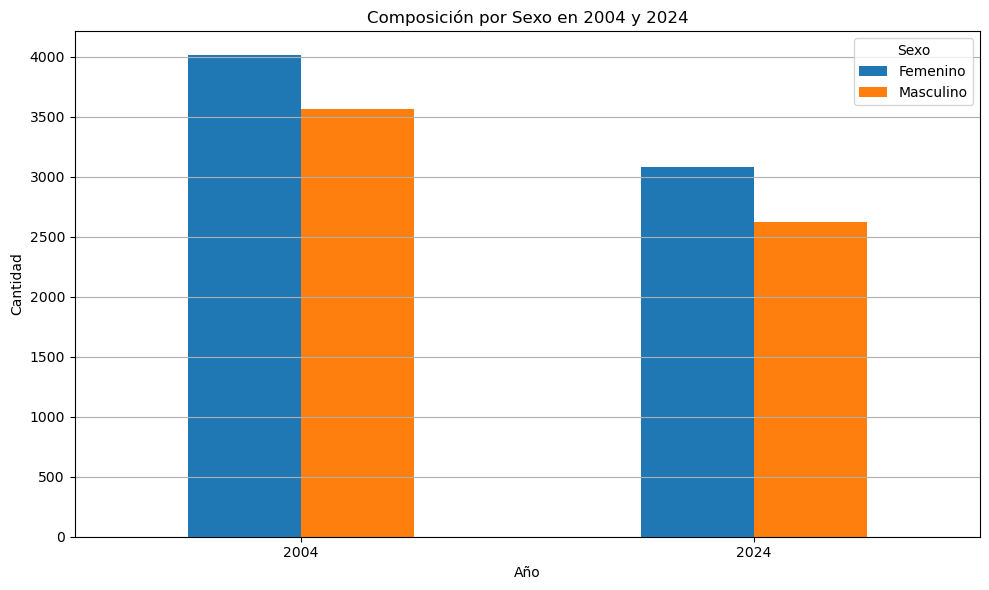

                              codusu  ch04   año       sexo
0                           125098       1  2004  Masculino
2                           125515       2  2004   Femenino
3                           125558       1  2004  Masculino
4                           125558       2  2004   Femenino
5                           125558       2  2004   Femenino
...                              ...   ...   ...        ...
14690  TQRMNOSXVHJKKMCDEIJAH00794775     1  2024  Masculino
14694  TQRMNOPUQHKMKNCDEIJAH00861661     1  2024  Masculino
14695  TQRMNOPUQHKMKNCDEIJAH00861661     1  2024  Masculino
14696  TQRMNOPUQHKMKNCDEIJAH00861661     1  2024  Masculino
14697  TQRMNOPUQHKMKNCDEIJAH00861661     2  2024   Femenino

[13284 rows x 4 columns]


In [156]:
# Base de datos temporal con sexoy año para graficar -- df_temp


# Crear una nueva columna 'año' en un DataFrame temporal
df_temp = df[['codusu', 'ch04']].copy()
df_temp['año'] = df_temp['codusu'].apply(lambda x: 2024 if isinstance(x, str) and any(char.isalpha() for char in x) else 2004) #encontramos los años dependiendo de como este escrita la columna CODUSU

# Mapeamos los valores de ch04 a etiquetas de sexo
sexo_map = {1: 'Masculino', 2: 'Femenino'}
df_temp['sexo'] = df_temp['ch04'].map(sexo_map)

# Contar la cantidad de personas por sexo y año
composicion_sexo = df_temp.groupby(['año', 'sexo']).size().unstack(fill_value=0)

# Crear el gráfico de barras
composicion_sexo.plot(kind='bar', figsize=(10, 6))

# Añadir etiquetas y título
plt.title('Composición por Sexo en 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # Para que las etiquetas del eje x estén horizontales
plt.legend(title='Sexo')
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

print(df_temp)

### Matrices de correlación

#### DATA FRAME A UTILIZAR

df_2004 --> BASE LIMPIA DE 2004 OBTENIDA DE df (Completo)

df_2024 --> BASE LIMPIA DE 2024 OBTENIDA DE df (Completo)

df --> BASE LIMPIA COMPLETA (2004 Y 2024 con datos numéricos y misma cantidad de columnas)

#### Matriz 2024

In [161]:
# Filtra el DataFrame para obtener solo las filas donde codusu no contenga letras (año 2004)
df_2004 = df[df['codusu'].apply(lambda x: isinstance(x, int) or (isinstance(x, str) and not any(char.isalpha() for char in x)))]

# Filtra el DataFrame para obtener solo las filas donde codusu no contenga letras (año 2024)
df_2024 = df[df['codusu'].apply(lambda x: isinstance(x, str) and any(char.isalpha() for char in x))]

In [162]:
# Seleccionar las columnas relevantes CON LAS QUE SE VA A TRABAJAR EN LA MATRIZ
columnas_relevantes = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']
df_2024 = df_2024[columnas_relevantes]
df_2004 = df_2004[columnas_relevantes]


In [163]:
# SE CAMBIA LA BASE USANDO DUMMY PARA PODER INTERPRETAR LA MATRIZ

df_2024 = pd.get_dummies(df_2024, columns=['ch04', 'ch07', 'ch08', 'nivel_ed'], 
                          prefix=['sexo', 'estado_civil', 'cobertura', 'educacion'], 
                          drop_first=False)

df_2024 = df_2024.rename(columns={
    'ch06': 'edad',
    'ipcf': 'ingreso'
})


# ---------------- SEXO -------------------
df_2024 = df_2024.rename(columns={'sexo_1': 'varon', 'sexo_2': 'mujer'})
# df_2024 = df_dummies.rename(columns={'estado_civil_1': 'unido','estado_civil_2': 'casado', 'estado_civil_3': 'separado','estado_civil_4': 'viudo', 'estado_civil_5': 'soltero'})


# ---------------- ESTADO CIVIL -------------------

df_2024['con_pareja'] = ((df_2024['estado_civil_1'] == 1) | (df_2024['estado_civil_2'] == 1)).astype(int)

# Crear columna 'sin_pareja' (1 si estado_civil_3, estado_civil_4 o estado_civil_5 son 1, 0 en caso contrario)
df_2024['sin_pareja'] = ((df_2024['estado_civil_3'] == 1) | 
                             (df_2024['estado_civil_4'] == 1) | 
                             (df_2024['estado_civil_5'] == 1)).astype(int)
df_2024 = df_2024.drop(columns=['estado_civil_1', 'estado_civil_2', 'estado_civil_3', 'estado_civil_4', 'estado_civil_5'])


# ---------------- COBERTURA -------------------

df_2024['si_cobertura'] = ((df_2024['cobertura_1'] == 1) | 
                               (df_2024['cobertura_2'] == 1) | 
                               (df_2024['cobertura_3'] == 1) | 
                               (df_2024['cobertura_12'] == 1) | 
                               (df_2024['cobertura_13'] == 1) | 
                               (df_2024['cobertura_23'] == 1)).astype(int)

df_2024['no_cobertura'] = ((df_2024['cobertura_4'] == 1).astype(int))
#df_2024['ns_cobertura'] = ((df_2024['cobertura_9'] == 1).astype(int))
df_2024 = df_2024.drop(columns=['cobertura_1', 'cobertura_2', "cobertura_4", 'cobertura_3', 'cobertura_9', 'cobertura_12', 'cobertura_13',  "cobertura_23"])


# ---------------- EDUCACIÓN -------------------

# Crear columna 'prim_inc' (1 si educación_1 es 1, 0 en caso contrario)
df_2024['prim_inc'] = (df_2024['educacion_1'] == 1).astype(int)
# Crear columna 'prim_com' (1 si educación_2 es 1, 0 en caso contrario)
df_2024['prim_com'] = (df_2024['educacion_2'] == 1).astype(int)
# Crear columna 'sec_inc' (1 si educación_3 es 1, 0 en caso contrario)
df_2024['sec_inc'] = (df_2024['educacion_3'] == 1).astype(int)
# Crear columna 'sec_com' (1 si educación_4 es 1, 0 en caso contrario)
df_2024['sec_com'] = (df_2024['educacion_4'] == 1).astype(int)
# Crear columna 'uni_inc' (1 si educación_5 es 1, 0 en caso contrario)
df_2024['uni_inc'] = (df_2024['educacion_5'] == 1).astype(int)
# Crear columna 'uni_comp' (1 si educación_6 es 1, 0 en caso contrario)
df_2024['uni_comp'] = (df_2024['educacion_6'] == 1).astype(int)
# Crear columna 'sin_instrucc' (1 si educación_7 es 1, 0 en caso contrario)
df_2024['sin_instrucc'] = (df_2024['educacion_7'] == 1).astype(int)
# Crear columna 'ns_instrucc' (1 si educación_9 es 1, 0 en caso contrario)
#['ns_instrucc'] = (df_2024['educacion_9'] == 1).astype(int)
# Eliminar las columnas de educación originales
df_2024 = df_2024.drop(columns=['educacion_1', 'educacion_2', 'educacion_3', 
                                       'educacion_4', 'educacion_5', 
                                       'educacion_6', 'educacion_7', 
                                       ])
# Se llenan las etapas anteriores como completada si se completa una etapa superior
df_2024.loc[(df_2024['uni_comp'] == 1) | (df_2024['sec_com'] == 1), 'prim_com'] = 1
# Si tiene 'sec_inc' (secundario incompleto) y 'uni_inc' (universitario incompleto), poner 1 en 'prim_com'
df_2024.loc[(df_2024['sec_inc'] == 1) | (df_2024['uni_inc'] == 1), 'prim_com'] = 1
# Si tiene 'uni_comp' (universitario completo) o 'uni_inc' (universitario incompleto), poner 1 en 'sec_com'
df_2024.loc[(df_2024['uni_comp'] == 1) | (df_2024['uni_inc'] == 1), 'sec_com'] = 1



# ---------------- ACTIVIDAD -------------------

df_2024['estado'] = df_2024['estado'].replace({
    1: 'ocupado',
    2: 'desocupado',
    3: 'inactivo',
    4: 'menor de 10 años',
    0: 'no respuesta'
})

# Concatenar las columnas dummy al DataFrame original
df_2024 = pd.concat([df_2024,  pd.get_dummies(df_2024['estado'], prefix='estado')], axis=1)
df_2024 = df_2024.drop(columns=['estado'])

df_2024['cat_inac'] = df_2024['cat_inac'].replace({
    1: 'jubilado/pensionado',
    2: 'rentista',
    3: 'estudiante',
    4: 'ama de casa',
    5: 'menor de 6 años',
    6: 'discapacitado',
    7: 'otros'
})


# ---------------- INACTIVIDAD -------------------

# Convertir la columna 'categoria_inactividad' en variables dummy
dummies_inactividad = pd.get_dummies(df_2024['cat_inac'], prefix='inactividad')

# Concatenar las columnas dummy al DataFrame original
df_2024 = pd.concat([df_2024, dummies_inactividad], axis=1)
df_2024 = df_2024.drop(columns=['cat_inac', "inactividad_0.0"]) #inac0.0 NO TIENE CODIGO 



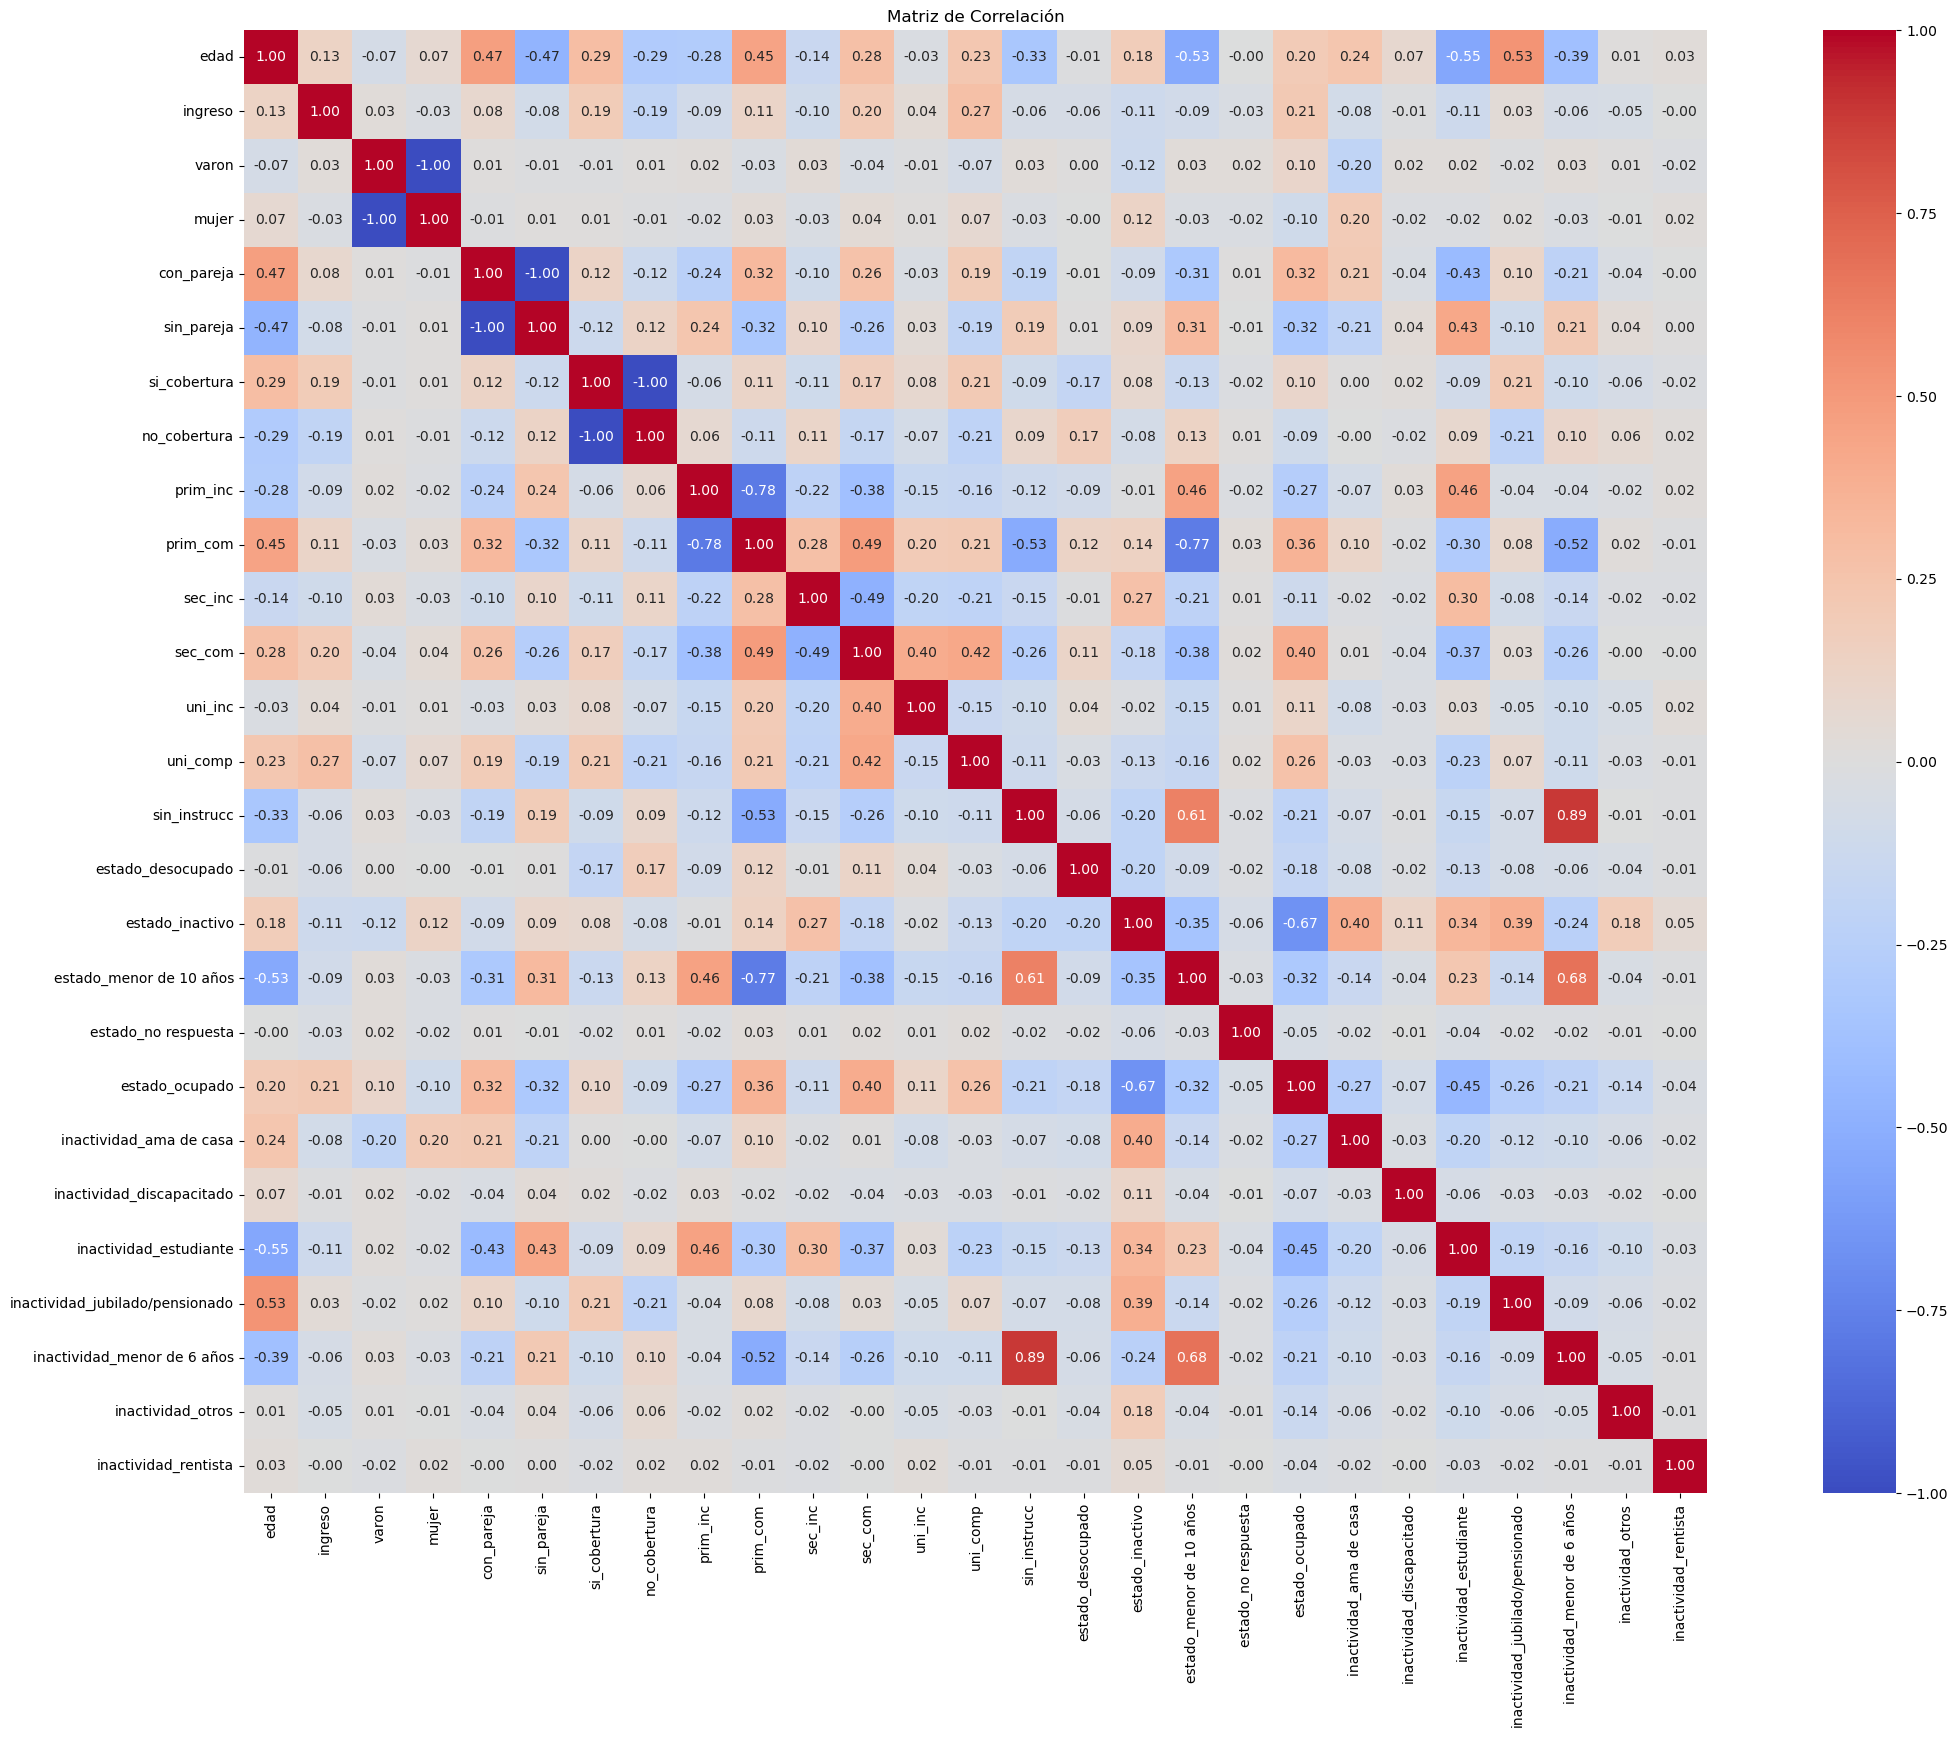

['edad', 'ingreso', 'varon', 'mujer', 'con_pareja', 'sin_pareja', 'si_cobertura', 'no_cobertura', 'prim_inc', 'prim_com', 'sec_inc', 'sec_com', 'uni_inc', 'uni_comp', 'sin_instrucc', 'estado_desocupado', 'estado_inactivo', 'estado_menor de 10 años', 'estado_no respuesta', 'estado_ocupado', 'inactividad_ama de casa', 'inactividad_discapacitado', 'inactividad_estudiante', 'inactividad_jubilado/pensionado', 'inactividad_menor de 6 años', 'inactividad_otros', 'inactividad_rentista']


In [164]:
matriz_correlacion = df_2024.corr()

# Crear un gráfico de calor para la matriz de correlación
plt.figure(figsize=(30, 19))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de Correlación')
plt.show()
print(df_2024.columns.tolist())

In [92]:
df_2024

,edad,ingreso,varon,mujer,con_pareja,sin_pareja,si_cobertura,no_cobertura,prim_inc,prim_com,...,sin_instrucc,estado_inactivo,estado_menor de 10 años,inactividad_ama de casa,inactividad_discapacitado,inactividad_estudiante,inactividad_jubilado/pensionado,inactividad_menor de 6 años,inactividad_otros,inactividad_rentista
7658,10.0,0.00,1,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,0
7659,5.0,0.00,1,0,0,1,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
7665,61.0,135000.00,0,1,0,1,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
7667,62.0,0.00,0,1,1,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
7669,77.0,160000.00,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14679,81.0,0.00,0,1,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
14681,1.0,88333.33,0,1,0,1,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
14685,21.0,0.00,1,0,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
14686,19.0,0.00,1,0,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0


#### Matriz 2004

In [165]:
df_2004 = df_2004[columnas_relevantes]


df_2004 = pd.get_dummies(df_2004, columns=['ch04', 'ch07', 'ch08', 'nivel_ed'], 
                          prefix=['sexo', 'estado_civil', 'cobertura', 'educacion'], 
                          drop_first=False)
df_2004 = df_2004.rename(columns={'sexo_1': 'varon', 'sexo_2': 'mujer'})
# df_2024 = df_dummies.rename(columns={'estado_civil_1': 'unido','estado_civil_2': 'casado', 'estado_civil_3': 'separado','estado_civil_4': 'viudo', 'estado_civil_5': 'soltero'})

df_2004['con_pareja'] = ((df_2004['estado_civil_1'] == 1) | (df_2004['estado_civil_2'] == 1)).astype(int)

# Crear columna 'sin_pareja' (1 si estado_civil_3, estado_civil_4 o estado_civil_5 son 1, 0 en caso contrario)
df_2004['sin_pareja'] = ((df_2004['estado_civil_3'] == 1) | 
                             (df_2004['estado_civil_4'] == 1) | 
                             (df_2004['estado_civil_5'] == 1)).astype(int)
df_2004 = df_2004.drop(columns=['estado_civil_1', 'estado_civil_2', 'estado_civil_3', 'estado_civil_4', 'estado_civil_5'])

df_2004['si_cobertura'] = ((df_2004['cobertura_1'] == 1) | 
                               (df_2004['cobertura_2'] == 1) | 
                               (df_2004['cobertura_3'] == 1) | 
                               (df_2004['cobertura_12'] == 1) | 
                               #(df_2004['cobertura_13'] == 1) | 
                               (df_2004['cobertura_23'] == 1)).astype(int)

df_2004['no_cobertura'] = ((df_2004['cobertura_4'] == 1).astype(int))
#df_2024['ns_cobertura'] = ((df_2024['cobertura_9'] == 1).astype(int))

df_2004 = df_2004.drop(columns=['cobertura_1', 'cobertura_2', "cobertura_4", 'cobertura_3', 'cobertura_9', 'cobertura_12', "cobertura_23"])

# Crear columna 'prim_inc' (1 si educación_1 es 1, 0 en caso contrario)
df_2004['prim_inc'] = (df_2004['educacion_1'] == 1).astype(int)

# Crear columna 'prim_com' (1 si educación_2 es 1, 0 en caso contrario)
df_2004['prim_com'] = (df_2004['educacion_2'] == 1).astype(int)

# Crear columna 'sec_inc' (1 si educación_3 es 1, 0 en caso contrario)
df_2004['sec_inc'] = (df_2004['educacion_3'] == 1).astype(int)

# Crear columna 'sec_com' (1 si educación_4 es 1, 0 en caso contrario)
df_2004['sec_com'] = (df_2004['educacion_4'] == 1).astype(int)

# Crear columna 'uni_inc' (1 si educación_5 es 1, 0 en caso contrario)
df_2004['uni_inc'] = (df_2004['educacion_5'] == 1).astype(int)

# Crear columna 'uni_comp' (1 si educación_6 es 1, 0 en caso contrario)
df_2004['uni_comp'] = (df_2004['educacion_6'] == 1).astype(int)

# Crear columna 'sin_instrucc' (1 si educación_7 es 1, 0 en caso contrario)
df_2004['sin_instrucc'] = (df_2004['educacion_7'] == 1).astype(int)

# Crear columna 'ns_instrucc' (1 si educación_9 es 1, 0 en caso contrario)
#['ns_instrucc'] = (df_2024['educacion_9'] == 1).astype(int)

# Eliminar las columnas de educación originales
df_2004 = df_2004.drop(columns=['educacion_1', 'educacion_2', 'educacion_3', 
                                       'educacion_4', 'educacion_5', 
                                       'educacion_6', 'educacion_7', 
                                       ])


df_2004.loc[(df_2004['uni_comp'] == 1) | (df_2004['sec_com'] == 1), 'prim_com'] = 1

# Si tiene 'sec_inc' (secundario incompleto) y 'uni_inc' (universitario incompleto), poner 1 en 'prim_com'
df_2004.loc[(df_2024['sec_inc'] == 1) | (df_2004['uni_inc'] == 1), 'prim_com'] = 1

# Si tiene 'uni_comp' (universitario completo) o 'uni_inc' (universitario incompleto), poner 1 en 'sec_com'
df_2004.loc[(df_2024['uni_comp'] == 1) | (df_2004['uni_inc'] == 1), 'sec_com'] = 1




df_2004 = df_2004.rename(columns={
    'ch06': 'edad',
    'ipcf': 'ingreso'
})




df_2004['actividad'] = df_2004['estado'].replace({
    1: 'ocupado',
    2: 'desocupado',
    3: 'inactivo',
    4: 'menor de 10 años',
    #0: 'no respuesta'
})



# Concatenar las columnas dummy al DataFrame original

df_2004 = pd.concat([df_2004,  pd.get_dummies(df_2004['actividad'], prefix='actividad')], axis=1)

df_2004 = df_2004.drop(columns=['estado'])


df_2004['categoria_inactividad'] = df_2004['cat_inac'].replace({
    1: 'jubilado/pensionado',
    2: 'rentista',
    3: 'estudiante',
    4: 'ama de casa',
    5: 'menor de 6 años',
    6: 'discapacitado',
    7: 'otros'})

#Convertir la columna 'categoria_inactividad' en variables dummy
dummies_inactividad = pd.get_dummies(df_2004['categoria_inactividad'], prefix='inactividad')


# Concatenar las columnas dummy al DataFrame original
df_2004 = pd.concat([df_2004, dummies_inactividad], axis=1)
df_2004 = df_2004.drop(columns=['actividad_0', 'cat_inac', "inactividad_0.0",'categoria_inactividad'] )

C:\Users\aula\AppData\Local\Temp\ipykernel_22284\2958260614.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df_2004.corr()


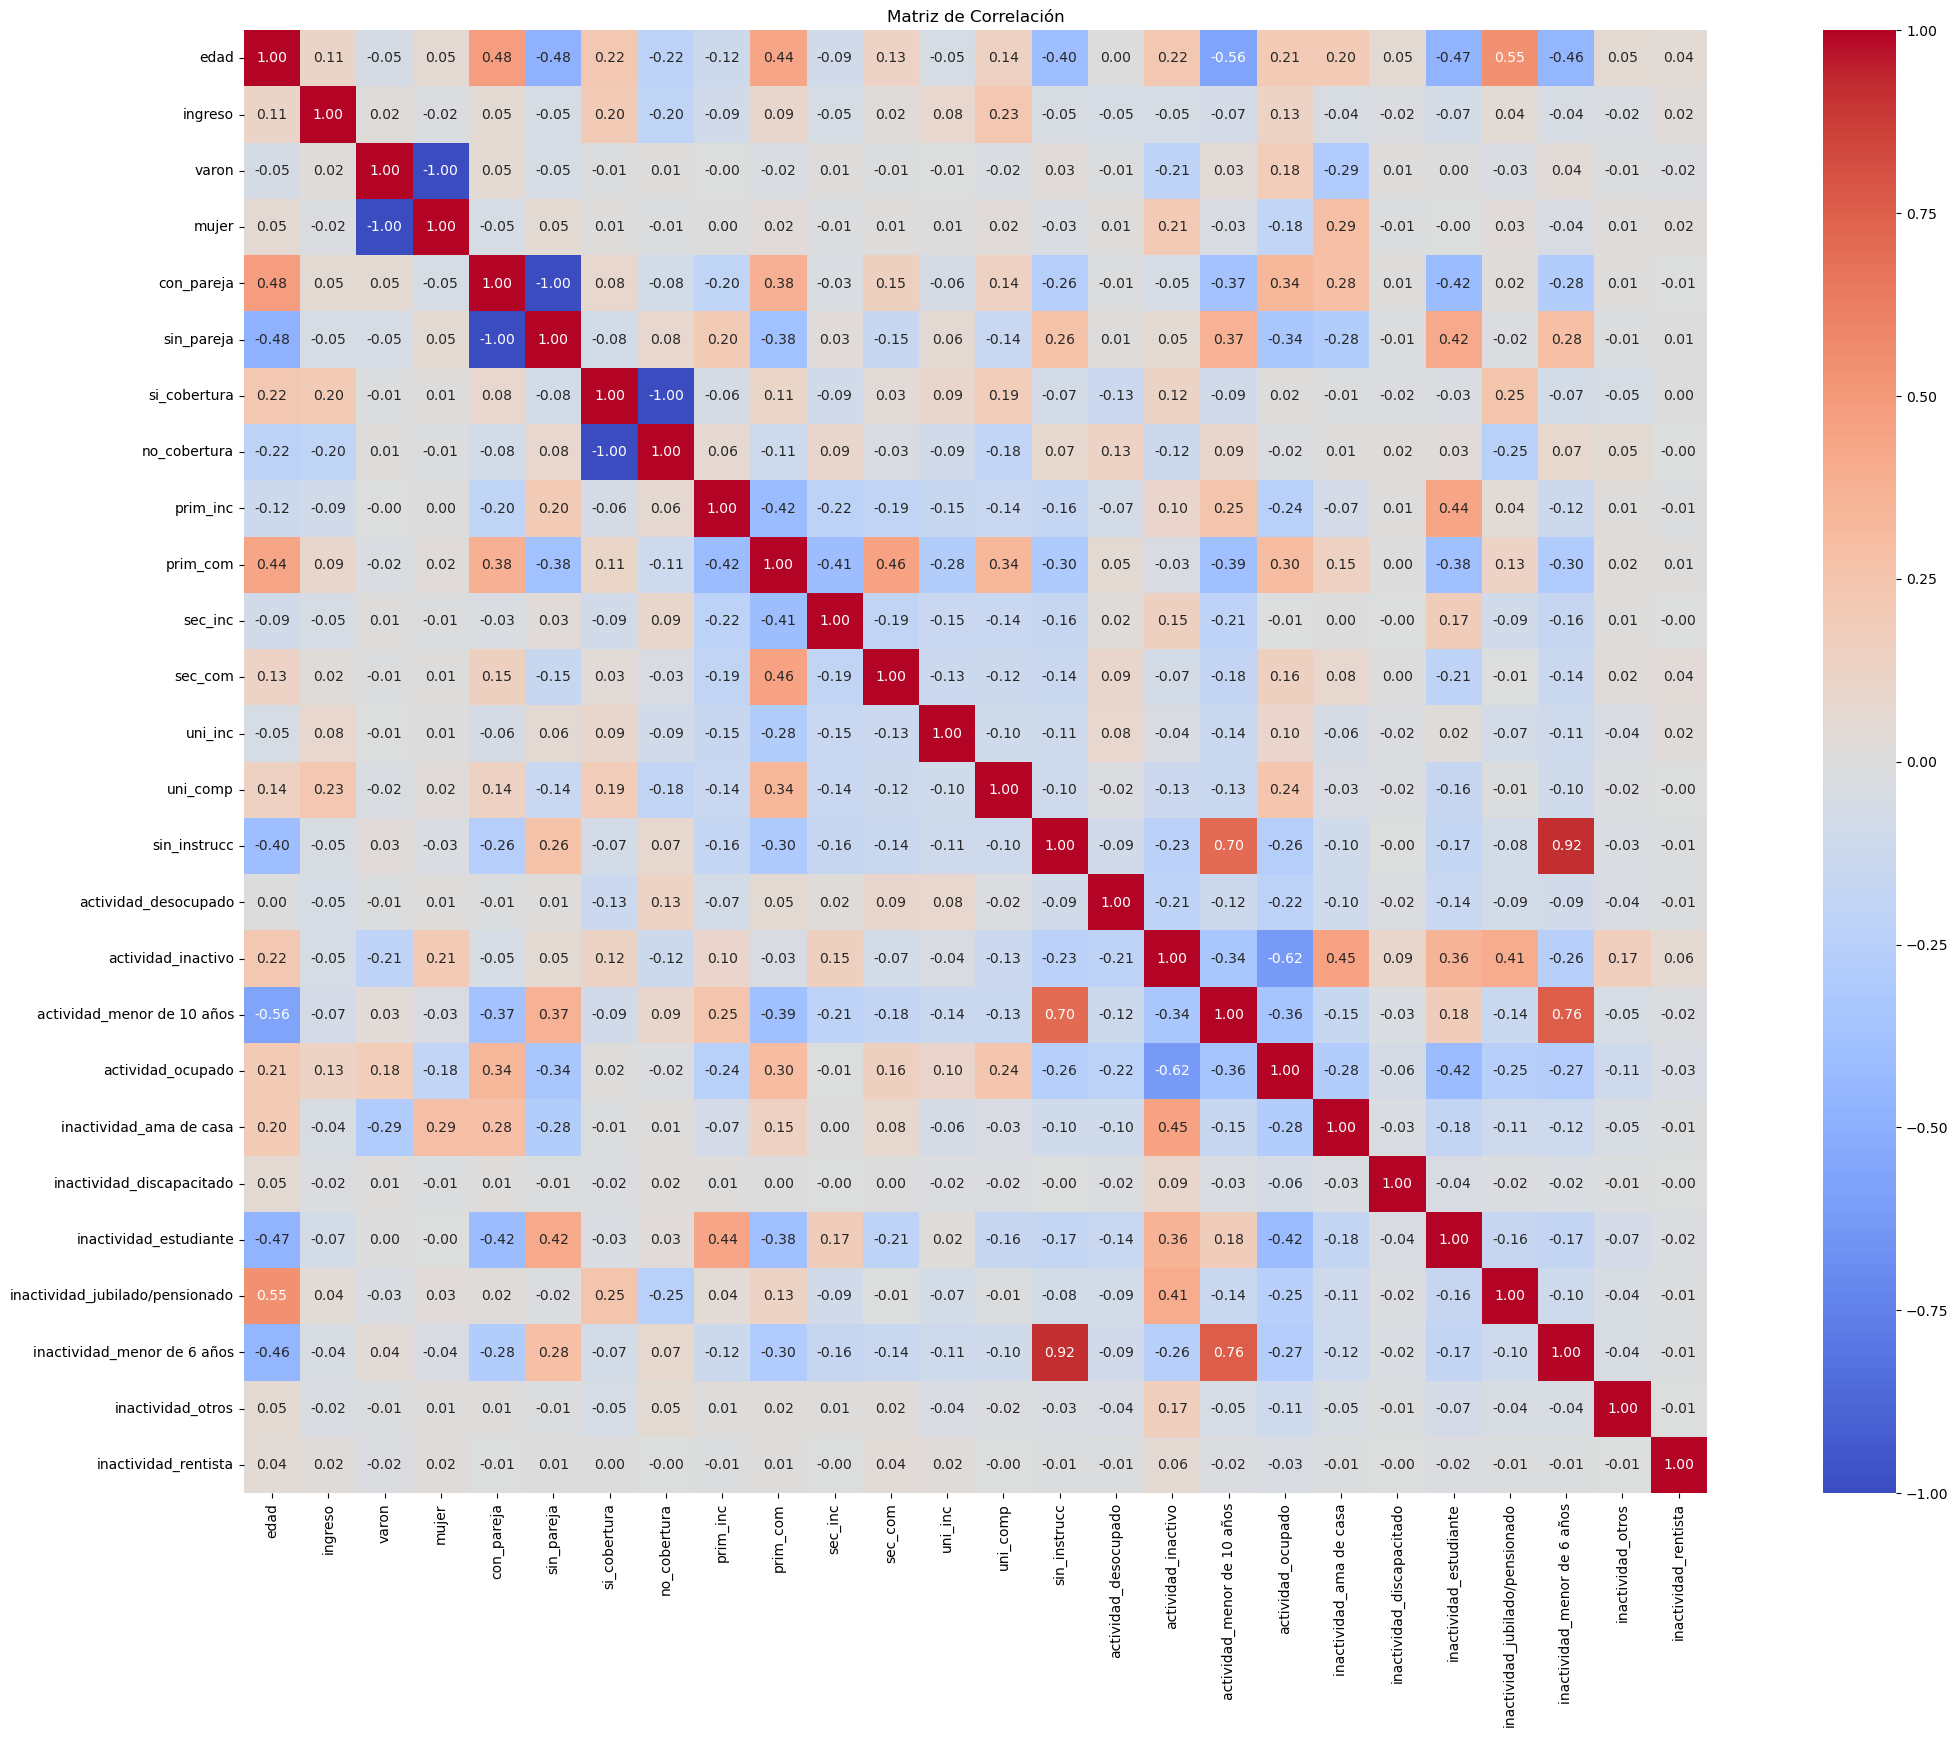

['edad', 'ingreso', 'varon', 'mujer', 'con_pareja', 'sin_pareja', 'si_cobertura', 'no_cobertura', 'prim_inc', 'prim_com', 'sec_inc', 'sec_com', 'uni_inc', 'uni_comp', 'sin_instrucc', 'estado_desocupado', 'estado_inactivo', 'estado_menor de 10 años', 'estado_no respuesta', 'estado_ocupado', 'inactividad_ama de casa', 'inactividad_discapacitado', 'inactividad_estudiante', 'inactividad_jubilado/pensionado', 'inactividad_menor de 6 años', 'inactividad_otros', 'inactividad_rentista']


In [167]:
# Calcular la matriz de correlación
matriz_correlacion = df_2004.corr()

# Crear un gráfico de calor para la matriz de correlación
plt.figure(figsize=(30, 19))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de Correlación')
plt.show()
print(df_2024.columns.tolist())

In [ ]:
df_2004

### Personas Economicamente activas (PEA)

Condición de actividad
0 = Entrevista individual no realizada
 (no respuesta al cuestionario
 individual)
1 = Ocupado
2 = Desocupado
3 = Inactivo
4 = Menor de 10 años

Para saber cuales no respondieron tiene que ser 0


df['estado'] = df['estado'].replace ('Entrevista individual no realizada', 0)

df['estado'] = df['estado'].replace ('Ocupado', 1)

df['estado'] = df['estado'].replace ('Desocupado', 2)

df['estado'] = df['estado'].replace ('Inactivo', 3)

df['estado'] = df['estado'].replace ('Menor de 10 años', 4)

df['estado'] = df['estado'].replace ("Entrevista individual no realizada (no respuesta al cuestion", 0)


#### DATA FRAME A UTILIZAR

respondieron  -->  BASE LIMPIA COMPLETA (2004 Y 2024 con datos numéricos y misma cantidad de columnas QUE CONTIENE GENTE QUE RESPONDIO CUAL ES SU ESTADO) / se agrega columna PEA / después se agrega PET

norespondieron  --> BASE LIMPIA COMPLETA (2004 Y 2024 con datos numéricos y misma cantidad de columnas QUE CONTIENE GENTE QUE NO RESPONDIO CUAL ES SU ESTADO): SON 37

df --> BASE LIMPIA COMPLETA (2004 Y 2024 con datos numéricos y misma cantidad de columnas)

In [170]:
cantidad_ceros = (df['estado'] == 0).sum()
print(f'Cantidad de personas que no respondieron a su condición de actividad (estado): {cantidad_ceros}')


#BASE DE DATOS RESPONDIERON / NORESPONDIERON
respondieron = df[df['estado'] != 0]
# Filtrar las observaciones donde no respondieron
norespondieron = df[df['estado'] == 0]

Cantidad de personas que no respondieron a su condición de actividad (estado): 37


In [171]:
respondieron['PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0) 

C:\Users\aula\AppData\Local\Temp\ipykernel_22284\3368509221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)


In [172]:
respondieron

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,PEA
0,125098,1.0,1.0,1.0,2004.0,1,1,S,32,1299.0,...,,01,368.0,07,,06,06,,04,0
2,125515,1.0,1.0,1.0,2004.0,1,1,S,32,1486.0,...,,02,440.0,07,,07,07,,05,0
3,125558,1.0,1.0,1.0,2004.0,1,1,S,32,1674.0,...,,08,532.5,08,,08,08,,06,1
4,125558,1.0,2.0,1.0,2004.0,1,1,S,32,1674.0,...,,08,532.5,08,,08,08,,06,0
5,125558,1.0,3.0,1.0,2004.0,1,1,S,32,1674.0,...,,08,532.5,08,,08,08,,06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14685,TQRMNORWVHLKOPCDEIIAD00861660,1.0,4,1.0,2024.0,1,1,S,32,590.0,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
14686,TQRMNORWVHLKOPCDEIIAD00861660,1.0,5,1.0,2024.0,1,1,S,32,590.0,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
14687,TQRMNORWVHLKOPCDEIIAD00861660,1.0,6,1.0,2024.0,1,1,S,32,590.0,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
14688,TQRMNOPSYHJLOQCDEIIAD00794774,1.0,1,1.0,2024.0,1,1,S,32,1376.0,...,NaN,7,910000.0,10,NaN,10,10.0,NaN,10,1


C:\Users\aula\AppData\Local\Temp\ipykernel_22284\808833570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['anio'] = respondieron['codusu'].apply(lambda x: '2024' if any(char.isalpha() for char in x) else '2004')


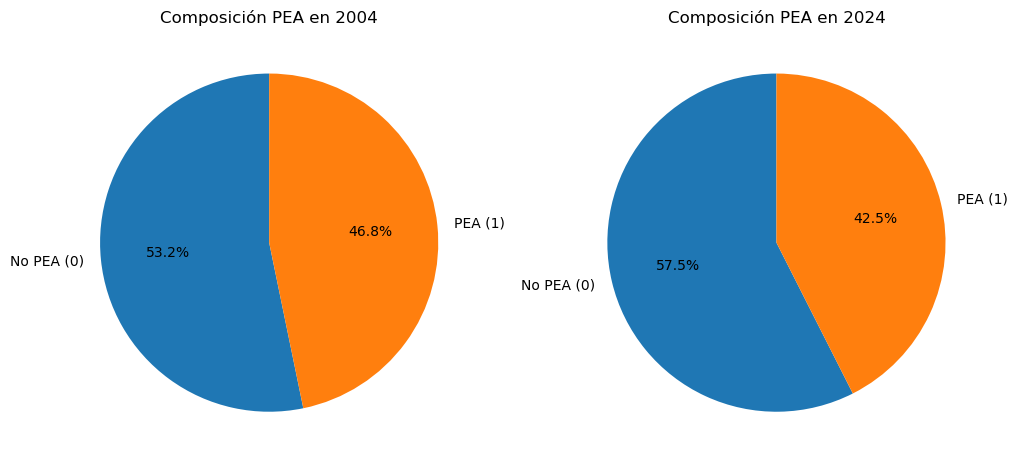

In [174]:
# calculamos PEA para base de datos respondieron.

respondieron['anio'] = respondieron['codusu'].apply(lambda x: '2024' if any(char.isalpha() for char in x) else '2004')

# Contar la cantidad de PEA por año
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para 2004
ax[0].pie(respondieron.groupby(['anio', 'PEA']).size().unstack(fill_value=0).loc['2004'], labels=['No PEA (0)', 'PEA (1)'], autopct='%1.1f%%', startangle=90)
ax[0].set_title('Composición PEA en 2004')

# Gráfico para 2024
ax[1].pie(respondieron.groupby(['anio', 'PEA']).size().unstack(fill_value=0).loc['2024'], labels=['No PEA (0)', 'PEA (1)'], autopct='%1.1f%%', startangle=90)
ax[1].set_title('Composición PEA en 2024')

plt.show()


PET          0          1
anio                     
2004  3.672316  96.327684
2024  4.306418  95.693582


C:\Users\aula\AppData\Local\Temp\ipykernel_22284\1707372118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PET'] = np.where((respondieron["PEA"] == 1) & (respondieron["ch06"].between(15,65)),1,0)


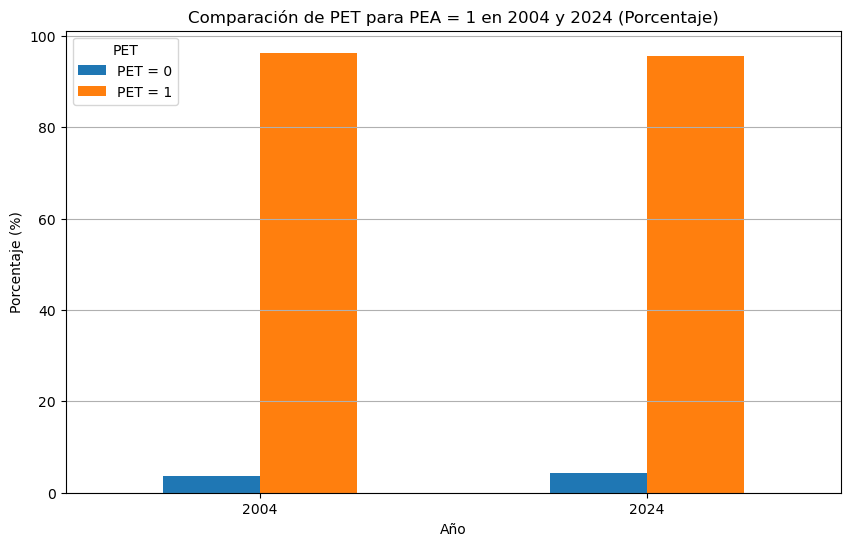

In [176]:
respondieron['PET'] = np.where((respondieron["PEA"] == 1) & (respondieron["ch06"].between(15,65)),1,0)
resultados = respondieron.groupby(['anio', 'PET']).size().unstack(fill_value=0)

# Filtrar los datos  PEA = 1
data_filtered = respondieron[(respondieron['PEA'] == 1)]

# Contar PET = 1 y PET = 0 para cada año
resultados = data_filtered.groupby(['anio', 'PET']).size().unstack(fill_value=0)

resultados_percentage = resultados.div(resultados.sum(axis=1), axis=0) * 100
print(resultados_percentage)

# Crear el gráfico de barras
resultados_percentage.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Comparación de PET para PEA = 1 en 2004 y 2024 (Porcentaje)')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Año')
plt.xticks(rotation=0)
plt.legend(title='PET', labels=['PET = 0', 'PET = 1'])
plt.grid(axis='y')
plt.show()

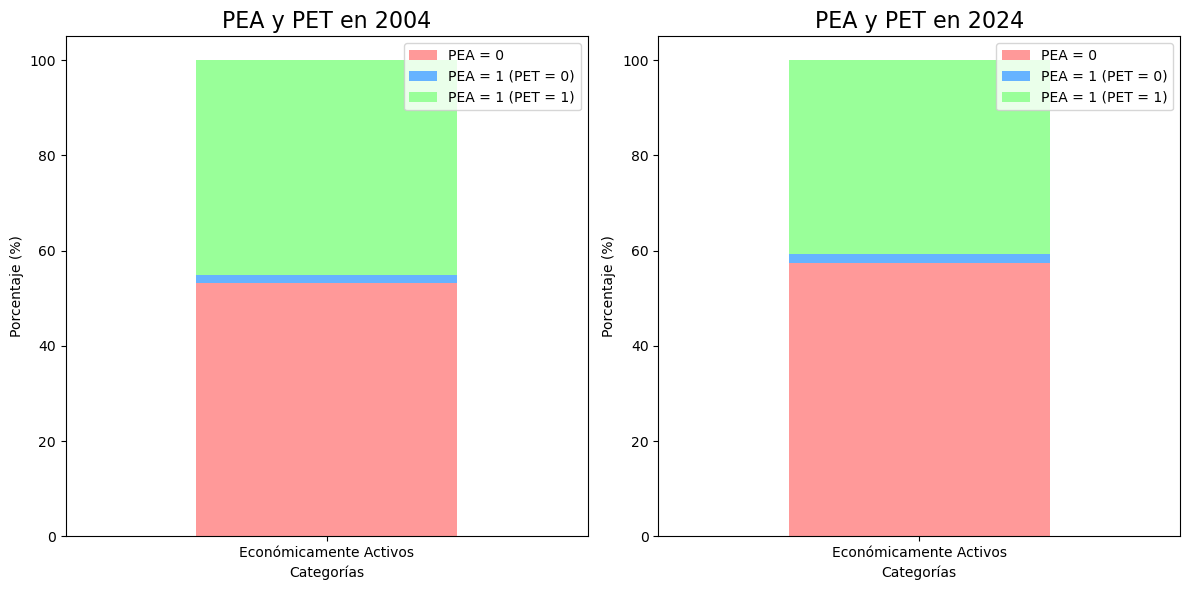

In [177]:
# SE COMPARAN LOS GRAFICOS DE PET Y PEA

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Iterar sobre los años
for i, year in enumerate(["2004", "2024"]):
    # Filtrar los datos para el año actual
    data_filtered = respondieron[respondieron['anio'] == year]
    
    # Calcular la PEA (Económicamente Activos)
    pea_counts = data_filtered['PEA'].value_counts(normalize=True) * 100
    
    # Filtrar para PEA = 1 y calcular PET
    data_pea1 = data_filtered[data_filtered['PEA'] == 1]
    pet_counts = data_pea1['PET'].value_counts(normalize=True) * 100

    # Crear un DataFrame para los resultados
    results = pd.DataFrame({
        'PEA = 0': [pea_counts.get(0, 0)],
        'PEA = 1 (PET = 0)': [pet_counts.get(0, 0) * pea_counts.get(1, 0) / 100],
        'PEA = 1 (PET = 1)': [pet_counts.get(1, 0) * pea_counts.get(1, 0) / 100]
    })

    # Crear gráfico de barras apiladas
    results.plot(kind='bar', stacked=True, ax=axs[i], color=['#ff9999', '#66b3ff', '#99ff99'])
    
    # Añadir títulos y etiquetas
    axs[i].set_title(f'PEA y PET en {year}', fontsize=16)
    axs[i].set_ylabel('Porcentaje (%)')
    axs[i].set_xlabel('Categorías')
    axs[i].set_xticklabels(['Económicamente Activos'], rotation=0)

plt.tight_layout()
plt.show()

## Predicciones